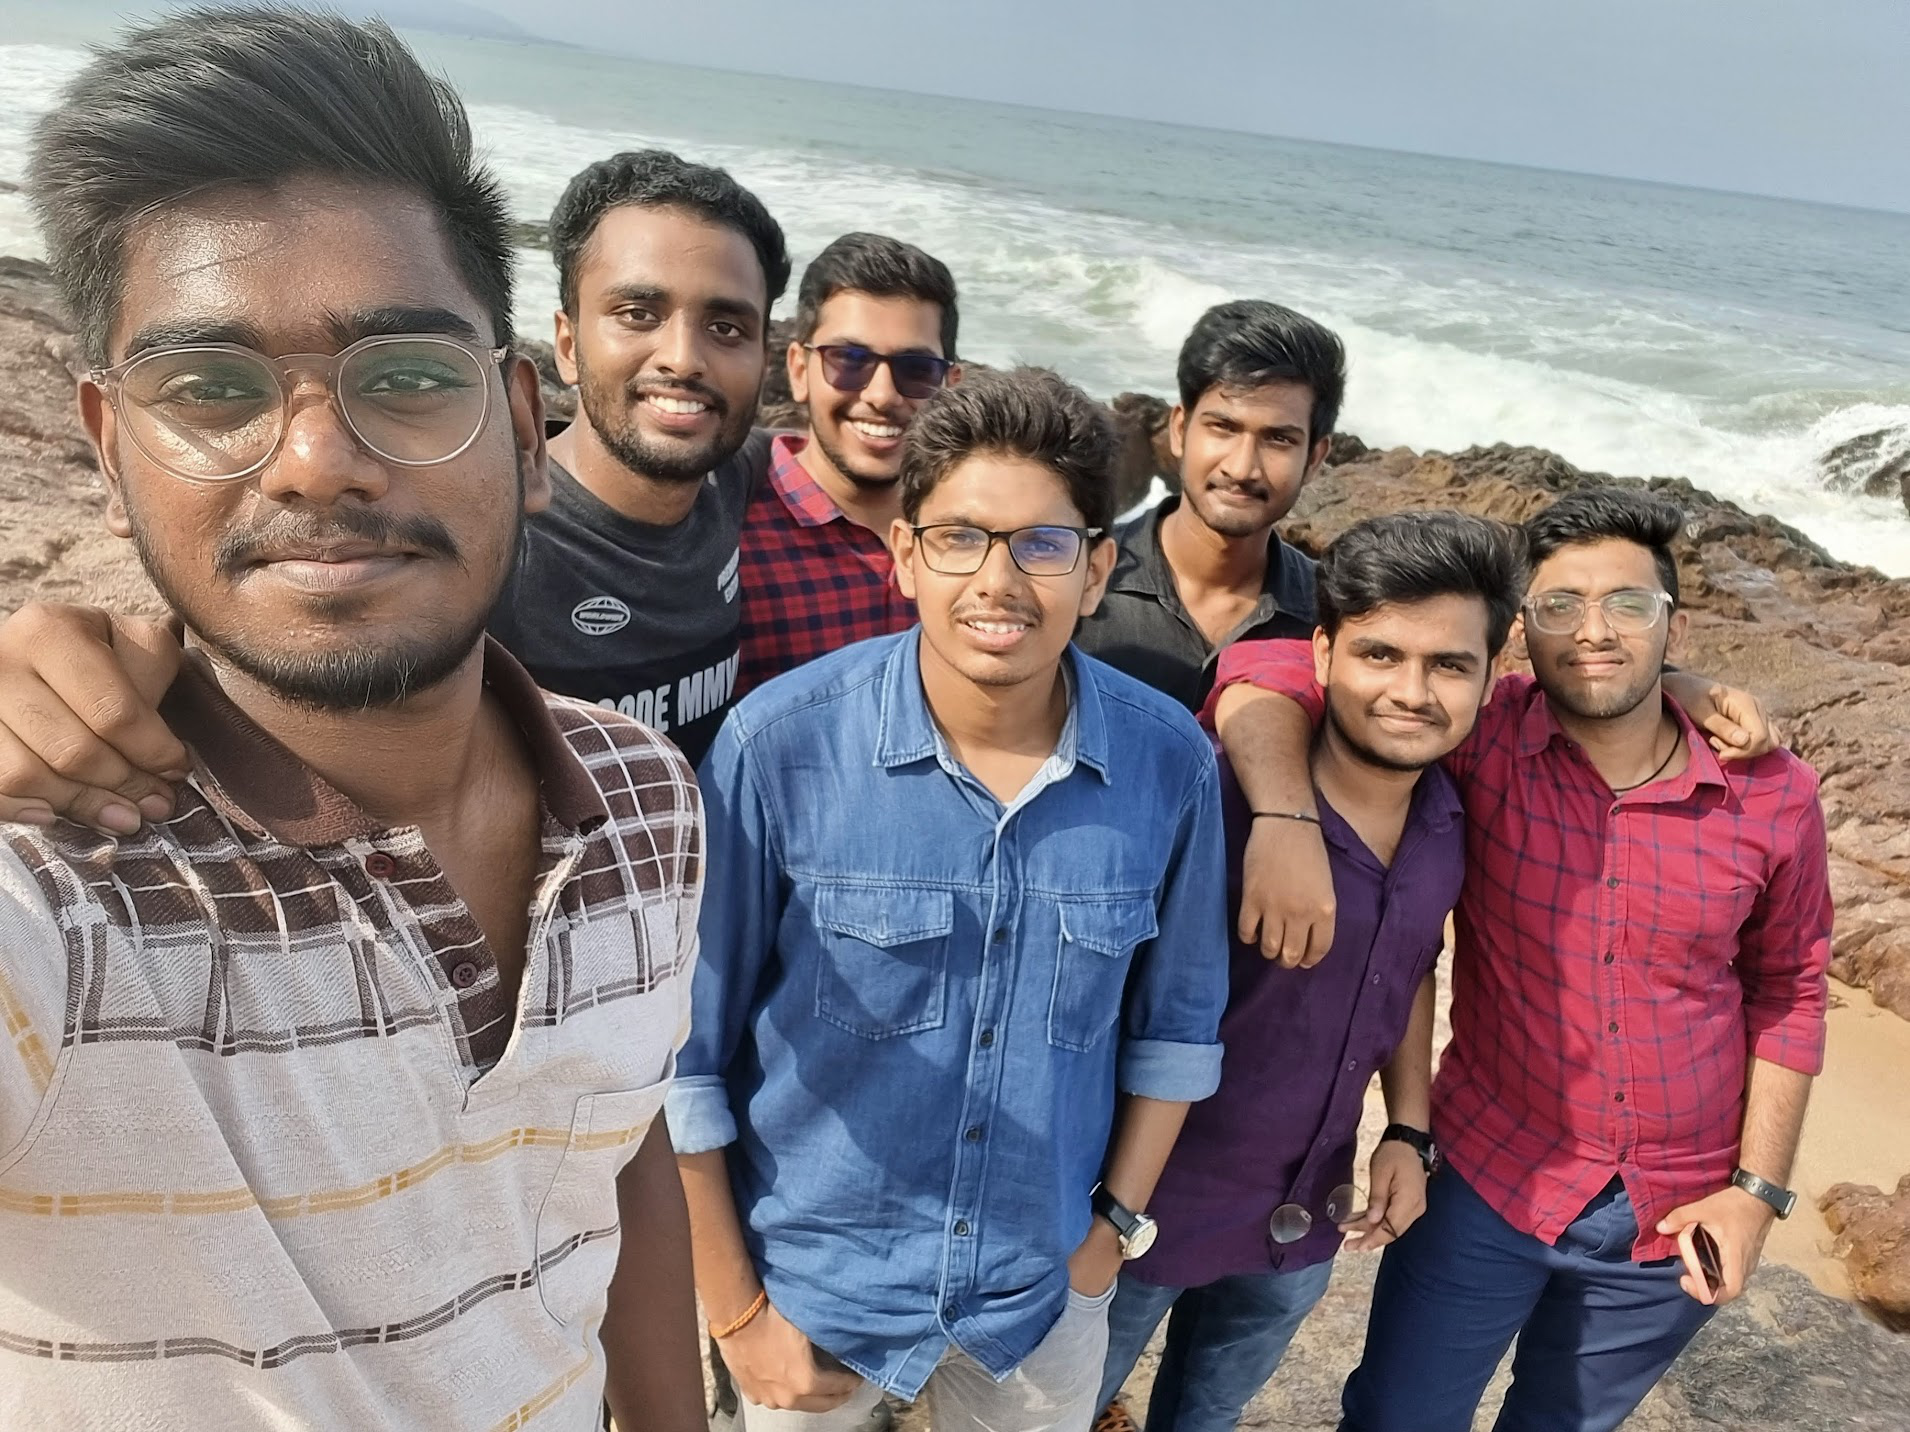

In [1]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('group.jpg')
display(pil_im)

In [2]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
vaishnav_image = face_recognition.load_image_file("vaishnav.jpg")
vaishnav_encoding = face_recognition.face_encodings(vaishnav_image)[0]

# Load a second sample picture and learn how to recognize it.
agasthya_image = face_recognition.load_image_file("agasthya.jpg")
agasthya_encoding = face_recognition.face_encodings(agasthya_image)[0]

abhiram_image = face_recognition.load_image_file("abhiram.jpg")
abhiram_encoding = face_recognition.face_encodings(abhiram_image)[0]

aravind_image = face_recognition.load_image_file("aravind.jpg")
aravind_encoding = face_recognition.face_encodings(aravind_image)[0]


chaitu_image = face_recognition.load_image_file("chaitu.jpg")
chaitu_encoding = face_recognition.face_encodings(chaitu_image)[0]

lokesh_image = face_recognition.load_image_file("lokesh.jpg")
lokesh_encoding = face_recognition.face_encodings(lokesh_image)[0]

naresh_image = face_recognition.load_image_file("naresh.jpg")
naresh_encoding = face_recognition.face_encodings(naresh_image)[0]


# Create arrays of known face encodings and their names
known_face_encodings = [
    vaishnav_encoding,
    agasthya_encoding,
    abhiram_encoding,
    aravind_encoding,
    chaitu_encoding,
    lokesh_encoding,
    naresh_encoding
    
]
known_face_names = [
    "vaishnav",
    "agasthya",
    "abhiram",
    "aravind",
    "chaitu",
    "lokesh",
    "naresh"

]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 7 images.


/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_17915/881739798.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_17915/881739798.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_17915/881739798.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_17915/881739798.py:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_heigh

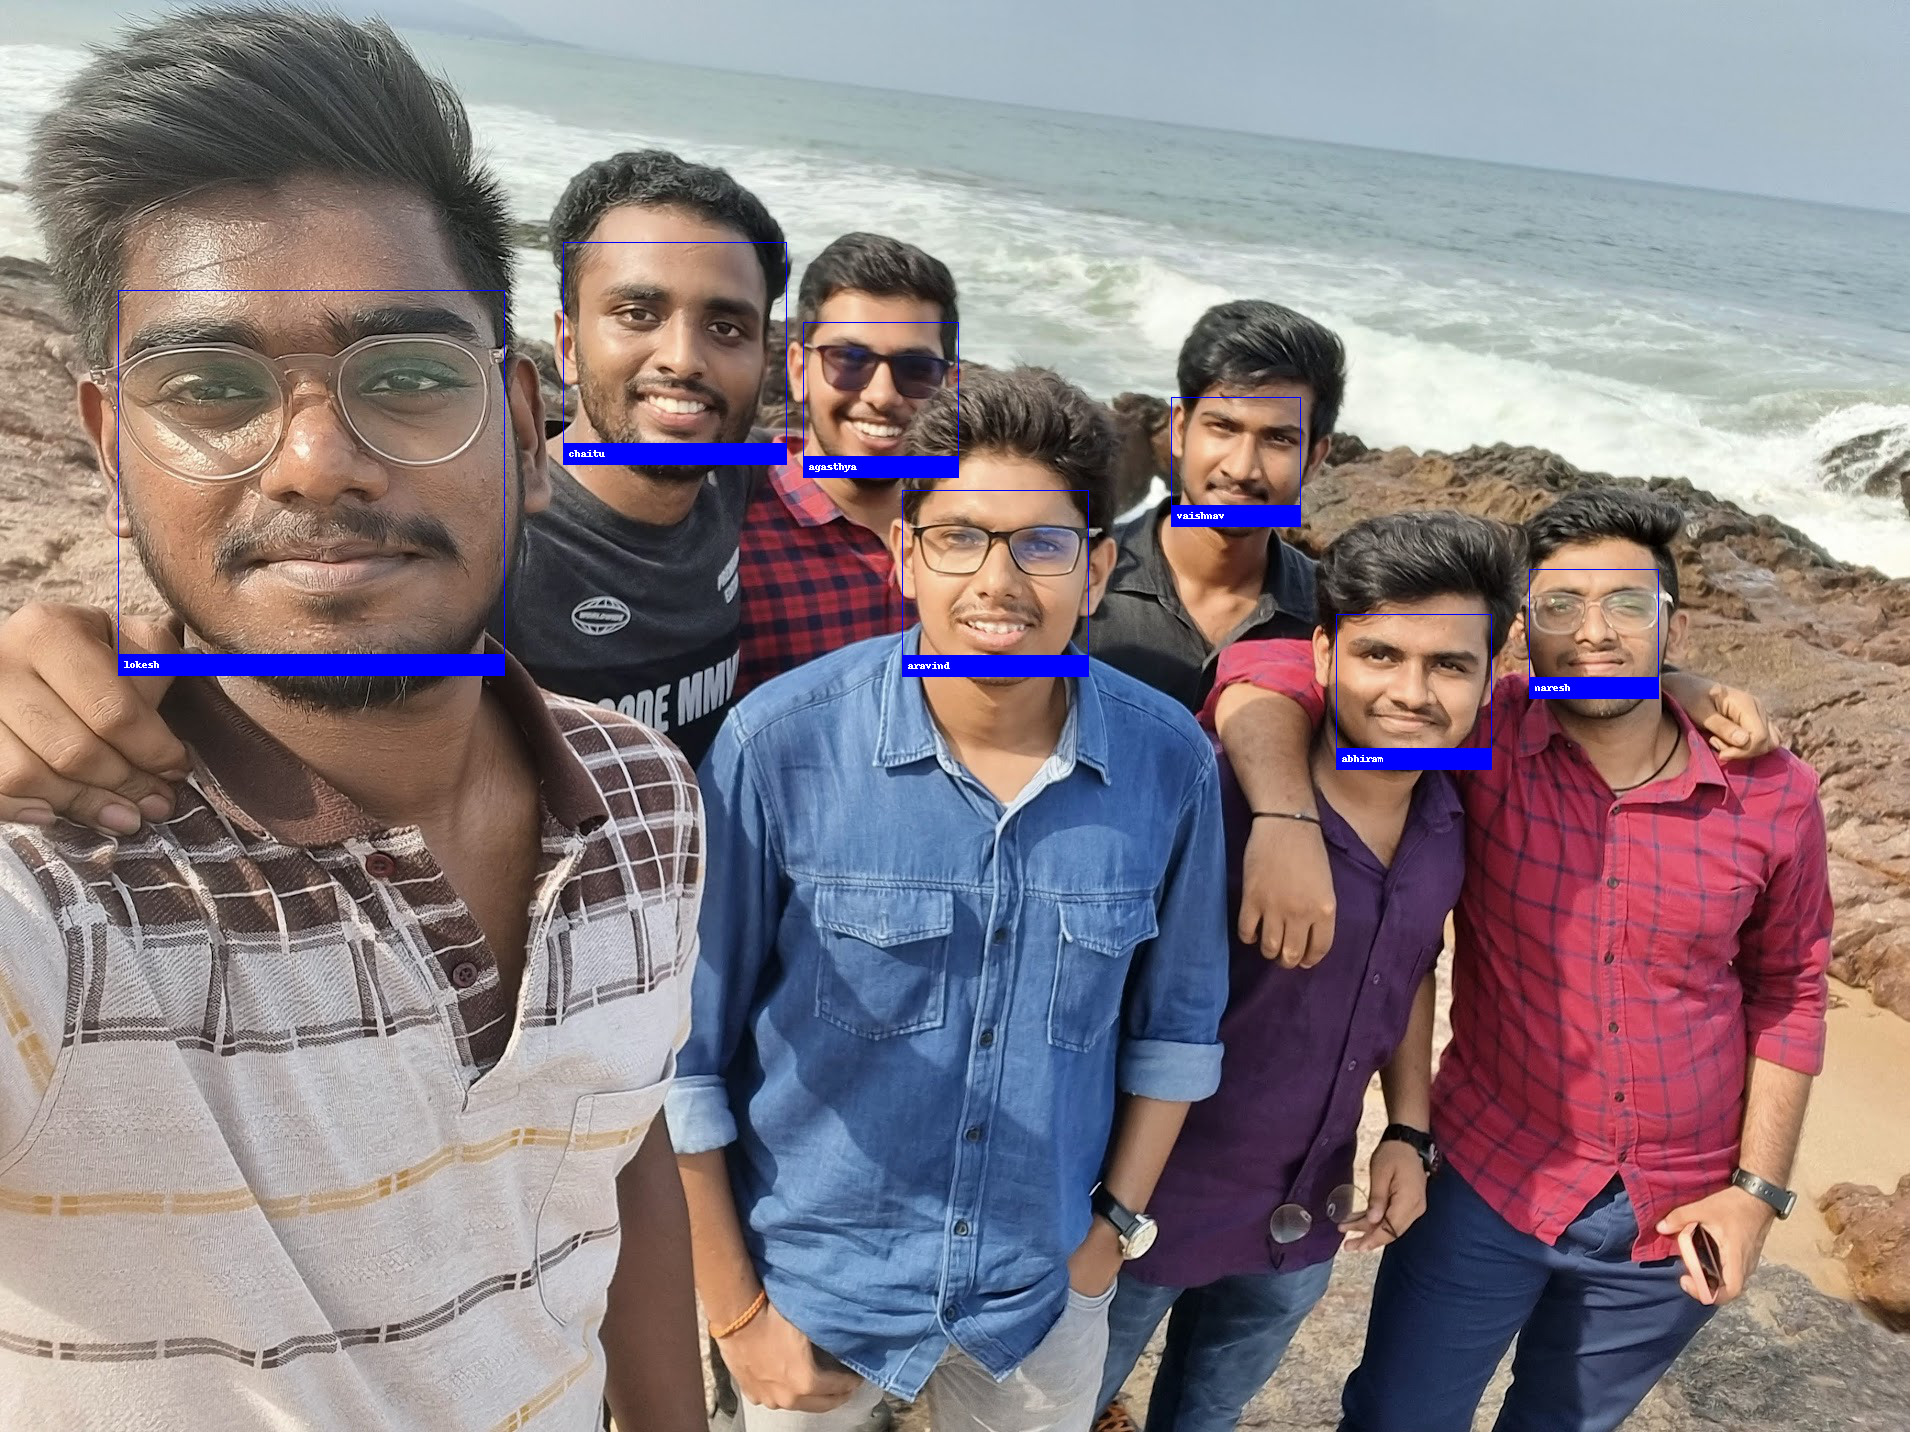

In [3]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("group.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)